Internations firearms ownership and homicide data, from the [UN's Small Arms Survey](http://www.smallarmssurvey.org/publications/by-type/yearbook/small-arms-survey-2015.html), via an [article at the Guardian](http://www.theguardian.com/news/datablog/2012/jul/22/gun-homicides-ownership-world-list), where the data can be acquired as a Google spreadsheet.  

In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('wfs_ownership_murders.csv')
cols = list(df.columns)


In [2]:
cols[0] = 'country'
cols[3] = 'pct_homicides_by_firearm'
cols[4] = 'num_homicides_by_firearm'
cols[5] = 'homicide_rate'
cols[6] = 'ownership_rate_rank'
cols[7] = 'ownership_rate'
cols[8] = 'total_civilian_ownership'
df.columns = cols

In [3]:
df.head()

,country,ISO code,Source,pct_homicides_by_firearm,num_homicides_by_firearm,homicide_rate,ownership_rate_rank,ownership_rate,total_civilian_ownership
0,Albania,AL,CTS,65.9,56,1.76,70,8.6,270000
1,Algeria,DZ,CTS,4.8,20,0.06,78,7.6,1900000
2,Angola,AO,NaN,NaN,NaN,NaN,34,17.3,2800000
3,Anguilla,AI,WHO-MDB,24.0,1,7.14,NaN,NaN,NaN
4,Argentina,AR,Ministry of Justice,52.0,1198,3.02,62,10.2,3950000


In [4]:
df.corr()

,pct_homicides_by_firearm,num_homicides_by_firearm,homicide_rate,ownership_rate_rank,ownership_rate,total_civilian_ownership
pct_homicides_by_firearm,1.000000,0.335228,0.624795,-0.130062,0.093335,0.100974
num_homicides_by_firearm,0.335228,1.000000,0.393307,-0.040497,0.054215,0.252594
homicide_rate,0.624795,0.393307,1.000000,0.008253,-0.102004,-0.019654
ownership_rate_rank,-0.130062,-0.040497,0.008253,1.000000,-0.824935,-0.180266
ownership_rate,0.093335,0.054215,-0.102004,-0.824935,1.000000,0.523829
total_civilian_ownership,0.100974,0.252594,-0.019654,-0.180266,0.523829,1.000000


In [5]:
import matplotlib

df2 = df[['homicide_rate','ownership_rate']]
df2.corr()

,homicide_rate,ownership_rate
homicide_rate,1.000000,-0.102004
ownership_rate,-0.102004,1.000000


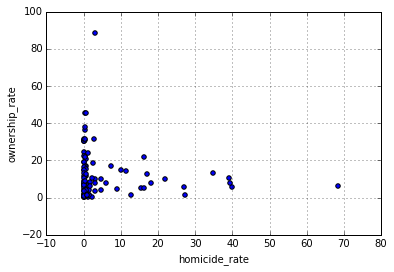

In [6]:
df2.plot(x='homicide_rate',y='ownership_rate', kind='scatter')

In [7]:
df[df.country != 'United States'].corr()

,pct_homicides_by_firearm,num_homicides_by_firearm,homicide_rate,ownership_rate_rank,ownership_rate,total_civilian_ownership
pct_homicides_by_firearm,1.000000,0.324549,0.629266,-0.115760,0.039435,-0.010201
num_homicides_by_firearm,0.324549,1.000000,0.404144,-0.011282,-0.071306,0.310830
homicide_rate,0.629266,0.404144,1.000000,0.005928,-0.114300,-0.020886
ownership_rate_rank,-0.115760,-0.011282,0.005928,1.000000,-0.882036,-0.205073
ownership_rate,0.039435,-0.071306,-0.114300,-0.882036,1.000000,0.209044
total_civilian_ownership,-0.010201,0.310830,-0.020886,-0.205073,0.209044,1.000000


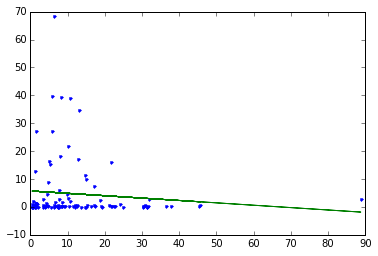

In [12]:

# sample data
dfnna = df.dropna()
x = dfnna.ownership_rate 
y = dfnna.homicide_rate 

# fit with np.polyfit
m, b = np.polyfit(x, y, 1)

plt.plot(x, y, '.')
plt.plot(x, m*x + b, '-')

In [13]:
import statsmodels.api as sm
x =  sm.add_constant(x)
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          homicide_rate   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.104
Date:                Tue, 23 Jun 2015   Prob (F-statistic):              0.296
Time:                        21:11:53   Log-Likelihood:                -404.86
No. Observations:                 107   AIC:                             813.7
Df Residuals:                     105   BIC:                             819.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
const              5.7183      1.435      3.